In [32]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [7]:
def parametric(t):
    return pd.DataFrame({
        "t": t,
        "x": 6. * np.cos(t - np.pi * 2) * np.cos(t / 5) - np.sin(t - np.pi * 2) * np.sin(t / 5), 
        "y": 6. * np.cos(t - np.pi * 2) * np.sin(t / 5) + np.sin(t - np.pi * 2) * np.cos(t / 5),
        "floor": np.random.randint(2, size=len(t))})

In [21]:
def gen_noise(n, sigma):
    dat = parametric(np.linspace(0, 5 * np.pi, n))
    if sigma > 0:
        dat["x"] += np.random.normal(0, sigma, n)
        dat["y"] += np.random.normal(0, sigma, n)
    return dat

In [153]:
def smooth(dat, sigma, width):
    ix = []
    iy = []
    norm = 1. / (sigma * (2 * np.pi))
    for i, (x, y) in dat[["x", "y"]].iterrows():
        rng = dat[["x", "y"]].iloc[max(i - width, 0):min(
            len(dat.index) - 1, i + width)]
        D = np.linalg.norm((x, y) - rng, axis=1)
        kern = np.exp(-(D / sigma)**2) * norm
        ix.append(np.average(rng["x"], weights=kern))
        iy.append(np.average(rng["y"], weights=kern))
    dat["ix"] = ix
    dat["iy"] = iy
    return dat

In [164]:
dat0 = gen_noise(80, 0)
dat = gen_noise(50, 1.0)

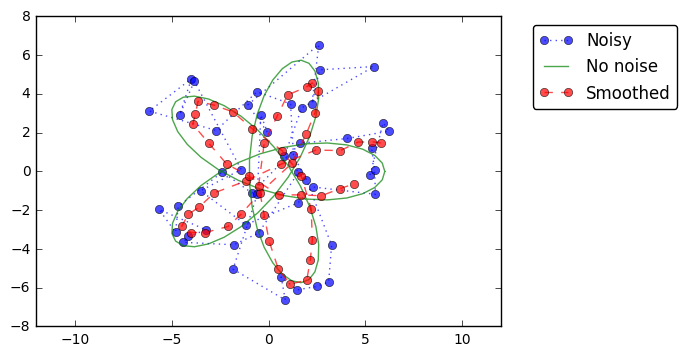

In [171]:
dat = smooth(dat, 80, 3)
plt.plot(dat["x"], dat["y"], "bo:", label="Noisy", alpha=0.7)
plt.plot(dat0["x"], dat0["y"], "g-", label="No noise", alpha=0.7)
plt.plot(dat["ix"], dat["iy"], "ro--", label="Smoothed", alpha=0.7)
plt.axis('equal')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fancybox=True)